In [ ]:
Práctica 4b: selección de características categóricas
Nota: antes de implementar los siguientes métodos, debemos asegurarnos de que el DataFrame sólo contiene características categóricas.

Preparación del conjunto de datos: Breast Cancer
En el conjunto de datos se encuentran datos de las pacientes con cáncer de mama con una recurrencia o no recurrencia del cáncer. Hay 286 ejemplos y nueve variables de entrada. Es un problema de clasificación binaria.

Un modelo trivial puede lograr una precisión del (70%) en este conjunto de datos. Un buen puntaje es de aproximadamente (76% +/- 3%).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
low_memory = False
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [2]:
file = "conjunto_de_datos_visita_museos_2018.csv"
df = pd.read_csv(file)
df = df.dropna(axis=1)
names = ['ANIO_ESTAD', 'ENT_REGIS', 'MES_ENTREV', 'DIA_ENTREV', 'SEXO', 'EDAD',
       'ENT_RESID', 'MUN_RESID', 'PAIS_RESID', 'NACIONALID', 'PAIS_EXTRA',
       'ESCOLARIDA', 'OCUPACION', 'LENGUA_1', 'ESTIM_FAM', 'PRIM_VISIT',
       'VIS_OTROS', 'MEDIO_1', 'PLAN_VISIT', 'MV_ACOMP', 'MV_CULTURA',
       'MV_APREND', 'MV_ESCOLAR', 'MV_LABORAL', 'MV_CONOCER', 'MV_ENTRETE',
       'MV_EDIFICI', 'MV_TALLER', 'MV_OTRO', 'MEDIO_TRAN', 'TIEMPO_TRA',
       'TIPO_ENTRA', 'PAV_NADIE', 'PAV_FAMILI', 'PAV_PAREJA', 'PAV_AMIGO',
       'PAV_COMPA', 'PAV_ESCOLA', 'PAV_TURIST', 'PAV_OTRO', 'SU_SALAS',
       'SU_TIENDA', 'SU_VISGUIA', 'SU_AUDIOG', 'SU_TALLER', 'SU_ACADEM',
       'SU_ACULTUR', 'SU_BIBLIOT', 'SU_ARCHIVO', 'SU_SILLA', 'SU_OTRO',
       'OPIN_EXPOS', 'DUR_VIS_H', 'DUR_VIS_M', 'REPETIR_VI', 'RECOMIE_VI',
       'EVAL_GRAL', 'M_NOVIS_1']
df = df.astype(int)
for i in names :
    #print(len(df[i].unique()))
    if(len(df[i].unique()) == 2):
        x =(df[i].unique())
        df[i].replace({
            x[0] : "a",
            x[1] : "b"
        }, inplace=True)
    if(len(df[i].unique()) == 3):
        x =(df[i].unique())
        df[i].replace({
            x[0] : "a",
            x[1] : "b",
            x[2] : "c"
        }, inplace=True)
    if(len(df[i].unique()) > 3):
        bins=np.linspace(min(df[i]),max(df[i]),4)
        names=["a","b","c"]
        df[i]=pd.cut(df[i],bins,labels=names)
df = df.dropna(axis = 1)
df = df.drop("ANIO_ESTAD", 1)
X = df.drop("SEXO",1)
y = df["SEXO"]
df = pd.concat([X, y], axis = 1)
df.to_csv("Archivo.csv", header = True, index = False)

In [3]:
file = "Archivo.csv"
data = pd.read_csv(file, header=None)
# arreglo
dataset = data.values

In [4]:
X = dataset[:, :-1]
y = dataset[:,-1]

In [5]:
X = X.astype(str)

In [6]:
def load_dataset(filename):
    # Cargamos el Dataframe
    data = pd.read_csv(filename, header=None)
    # Generamos un arreglo
    dataset = data.values
    # Dividimos en X y y
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # Forzamos que X sea string 
    X = X.astype(str)
    return X, y

In [7]:
# Cargamos el dataset
X, y = load_dataset(file)

# Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Checamos las dimensiones
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

('Train', (122455L, 37L), (122455L,))
('Test', (60315L, 37L), (60315L,))


In [9]:
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    oe.fit(X_test)
    X_test_enc =  oe.transform(X_test)
    return X_train_enc, X_test_enc
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

In [10]:
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    le.fit(y_test)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [11]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [12]:
# Selección de características con chi-squared
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

Característica 0: 1.529338
Característica 1: 1.300473
Característica 2: 4.937005
Característica 3: 7.260486
Característica 4: 2.551268
Característica 5: 5.196306
Característica 6: 1.785974
Característica 7: 8.957263
Característica 8: 3.118490
Característica 9: 4.522414
Característica 10: 1.467200
Característica 11: 1.432662
Característica 12: 1.625090
Característica 13: 3.628840
Característica 14: 1.553032
Característica 15: 1.009721
Característica 16: 2.012231
Característica 17: 29.240811
Característica 18: 62.312828
Característica 19: 12.904847
Característica 20: 1.272791
Característica 21: 1.429136
Característica 22: 1.244081
Característica 23: 1.087693
Característica 24: 2.086943
Característica 25: 1.400693
Característica 26: 1.173254
Característica 27: 4.429956
Característica 28: 1.031778
Característica 29: 5.145648
Característica 30: 1.017344
Característica 31: 1.053569
Característica 32: 1.050230
Característica 33: 1.147077
Característica 34: 1.004253
Característica 35: 1.051052

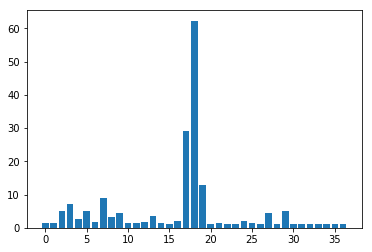

In [13]:
for i in range(len(fs.scores_)):
    print('Característica %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [22]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [ ]:
# Selección de características con mutual information
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)